<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('insurance.csv')

# Display the first few rows of the dataset
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,7725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Checking for Missing Values and Dataset Overview

First, let's check if our dataset has any missing values. We want to make sure there are no gaps in the data before moving forward. 

Next, we'll get a quick overview of the dataset's structure, including:
- The shape of the dataset (rows and columns).
- The data types and non-null counts for each column.
- Any duplicate rows.
- The unique values for categorical features like 'sex', 'smoker', and 'region'.


In [6]:
# Checking for missing data in the dataset
print("\nMissing Data:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Display the shape of the dataset
print("Shape of the Dataset:")
print(df.shape)
print("\n" + "="*50 + "\n")

# Display information about the dataset
print("Dataset Info:")
print(df.info())
print("\n" + "="*50 + "\n")

# Check for duplicate rows
print("Checking for Duplicate Rows:")
print(df.duplicated().sum())
print("\n" + "="*50 + "\n")

# Count and display the unique values for all columns
print("Count of Unique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")
print("\n" + "="*50 + "\n")

# Display the unique values for columns with <= 10 unique values
print("Unique Values in Columns with <= 10 Unique Values:")
for column in df.columns:
    if df[column].nunique() <= 10:  # Adjust this threshold if necessary
        print(f"{column}: {df[column].unique()}")



Missing Data:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Shape of the Dataset:
(1338, 7)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Checking for Duplicate Rows:
1


Count of Unique Values in Each Column:
age: 47
sex: 2
bmi: 548
children: 6
smoker: 2
region: 4
charges: 1337


Unique Values in Columns with <= 10 Unique Values:
sex: ['female' 'male']
children: [0 1 3 2 5 4]
smoker: ['yes' 'no']
region: ['southwest' 'southeast' '

### Data Exploration Results

After performing the initial data exploration, we observed the following:

1. **Dataset Dimensions:**
   - The dataset contains **1338 rows** and **7 columns**.

2. **Data Structure:**
   - The dataset includes the following columns:

     | Column Name | Description | Data Type | Number of Unique Values |
     |-------------|-------------|-----------|-------------------------|
     | `age`       | The age of the individual. | Quantitative | 47 |
     | `sex`       | The gender of the individual (male or female). | Categorical | 2 |
     | `bmi`       | Body mass index. | Quantitative | 548 |
     | `children`  | Number of children/dependents covered by insurance. | Quantitative | 6 |
     | `smoker`    | Whether the individual is a smoker (yes/no). | Categorical | 2 |
     | `region`    | The region of the individual (southwest, southeast, northwest, northeast). | Categorical | 4 |
     | `charges`   | The insurance charges. | Quantitative | 1337 |

3. **Missing Data:**
   - There are **no missing values** in any of the columns.

4. **Duplicate Rows:**
   - The dataset contains **1 duplicate row**, which may need to be removed.

5. **Unique Values Analysis:**
   - The columns `sex`, `smoker`, and `region` are categorical features with fewer than 10 unique values.
   - The `children` column is a quantitative feature, representing the number of dependents, with 6 unique values.

This table and analysis provide an overview of the dataset and help us understand the nature of the features before moving on to further analysis.


### Duplicate Rows

We identified that there was **1 duplicate row** in the dataset. To ensure our analysis is accurate and not affected by redundant data, we will proceed to remove the duplicate row.

Let's go ahead and drop the duplicate rows from the dataset.


In [9]:
# Drop the duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows
print("Checking for Duplicate Rows:")
print(df.duplicated().sum())

Checking for Duplicate Rows:
0



## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [11]:
# Calculate descriptive statistics for the dataset
descriptive_stats = df.describe()

# Show the descriptive statistics
print("\nDescriptive Statistics:")
print(descriptive_stats)
print("\n" + "="*50 + "\n")

# Calculate the mode for all columns (both quantitative and categorical)
for column in df.columns:
    mode_value = df[column].mode()
    print(f"Mode for '{column}':")
    print(mode_value)
    print("\n" + "="*50 + "\n")



Descriptive Statistics:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  15810.161128
std      14.044333     6.100468     1.205571  12558.705582
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   8116.680000
50%      39.000000    30.400000     1.000000  12404.879100
75%      51.000000    34.700000     2.000000  18955.220170
max      64.000000    53.130000     5.000000  64571.074480


Mode for 'age':
0    18
Name: age, dtype: int64


Mode for 'sex':
0    male
Name: sex, dtype: object


Mode for 'bmi':
0    32.3
Name: bmi, dtype: float64


Mode for 'children':
0    0
Name: children, dtype: int64


Mode for 'smoker':
0    no
Name: smoker, dtype: object


Mode for 'region':
0    southeast
Name: region, dtype: object


Mode for 'charges':
0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4    

### Descriptive Statistics - Results

From the descriptive statistics, we observe the following:

1. **Age**:
   - The average age is **39.22**, with a range from **18** to **64** years. The most common age is **18**, based on the **mode**.

2. **BMI**:
   - The average BMI is **30.66**, with values ranging from **15.96** to **53.13**. The most common BMI is **32.3**, based on the **mode**.

3. **Children**:
   - On average, individuals have around **1.1 children**, with a minimum of **0** and a maximum of **5** children. The most common value is **0** children, based on the **mode**.

4. **Charges**:
   - The average insurance charges are **\$15,810.16**, with a wide range from **\$1,121.87** to **\$64,571.07**. The **charges** column has multiple modes, indicating that there are several charge values with the same frequency (each with a frequency of 1).

5. **Smoker**:
   - The most common smoking status is **no** (not a smoker), based on the **mode**.

6. **Region**:
   - The most common region is **southeast**, based on the **mode**.

These statistics provide us with a comprehensive understanding of the dataset's distribution and central tendency. We can now proceed to further analysis, such as visualizing the distribution of these features.


## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', 'children', and 'charges'. Additionally, we'll generate box plots, calculate skewness, kurtosis, and count outliers for the continuous variables only (e.g., 'age', 'bmi', 'charges').

### Task:
- Plot the bar plot for 'children' (discrete variable)
- Plot the histogram for 'age', 'bmi', and 'charges' (continuous variables)
- Create box plots for all the quantitative variables ('age', 'bmi', 'children', 'charges')
- Calculate and display skewness and kurtosis for the continuous variables
- Count the outliers for the continuous variables


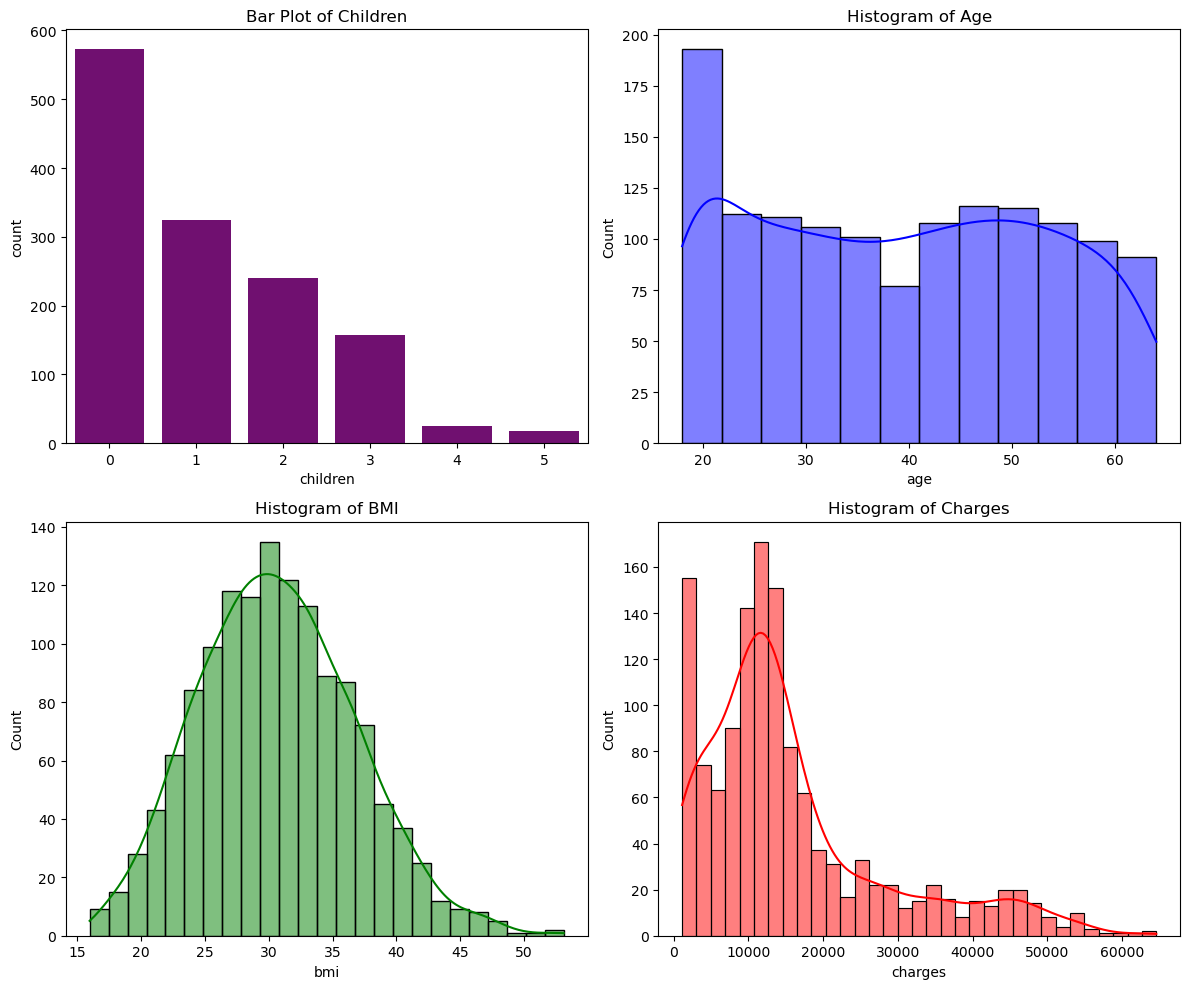

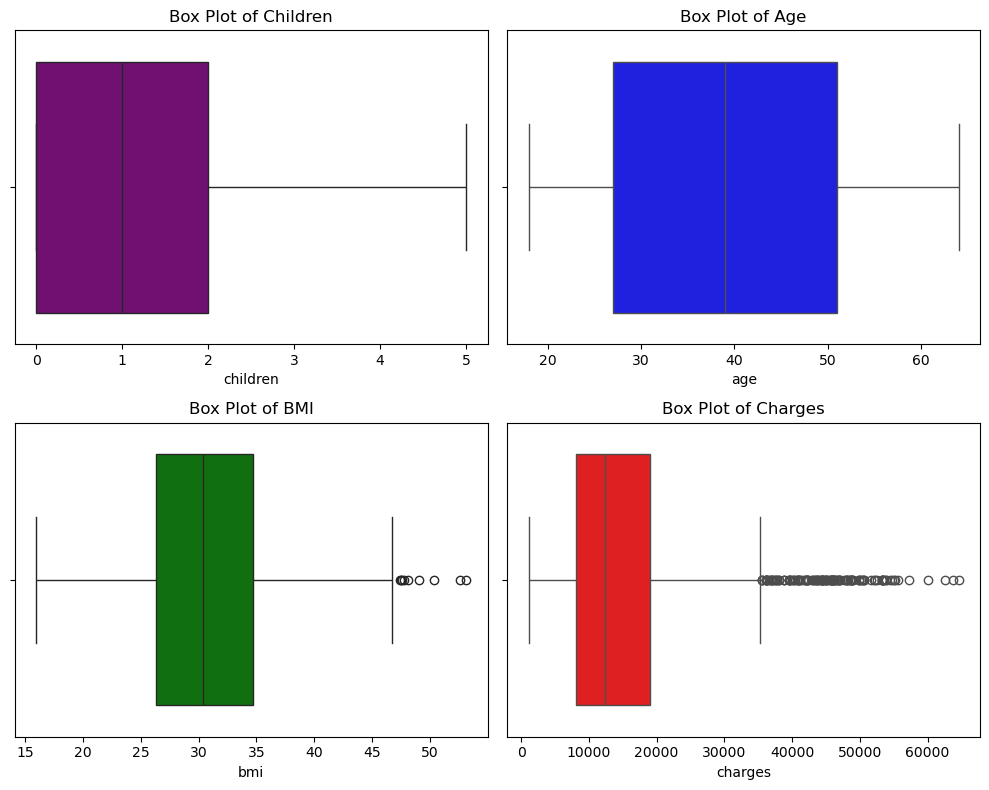


age - Skewness: 0.05
age - Kurtosis: -1.24

bmi - Skewness: 0.28
bmi - Kurtosis: -0.06

charges - Skewness: 1.38
charges - Kurtosis: 1.42

age - Outliers count: 0

bmi - Outliers count: 9

charges - Outliers count: 139


In [14]:
import matplotlib.pyplot as plt  # Importing matplotlib
import seaborn as sns  # Importing seaborn
from scipy.stats import skew, kurtosis  # Importing skewness and kurtosis functions

# Set the figure size for the plots
plt.figure(figsize=(12, 10))

# Plot bar plot for 'children' (discrete variable) - Top-left position
plt.subplot(2, 2, 1)
sns.countplot(x='children', data=df, color='purple')  # Changed color to purple for consistency
plt.title('Bar Plot of Children')

# Plot histogram for 'age' - Top-right position
plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True, color='blue', line_kws={'color': 'darkblue'})  # Separate color for KDE curve
plt.title('Histogram of Age')

# Plot histogram for 'bmi' - Bottom-left position
plt.subplot(2, 2, 3)
sns.histplot(df['bmi'], kde=True, color='green', line_kws={'color': 'darkgreen'})  # Separate color for KDE curve
plt.title('Histogram of BMI')

# Plot histogram for 'charges' - Bottom-right position
plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde=True, color='red', line_kws={'color': 'darkred'})  # Separate color for KDE curve
plt.title('Histogram of Charges')

# Show the histograms
plt.tight_layout()
plt.show()

# Create separate box plots for the quantitative variables with the same colors as histograms
plt.figure(figsize=(10, 8))

# Box plot for 'children' - Purple (same as bar plot)
plt.subplot(2, 2, 1)
sns.boxplot(x=df['children'], color='purple')
plt.title('Box Plot of Children')

# Box plot for 'age' - Blue (same as histogram)
plt.subplot(2, 2, 2)
sns.boxplot(x=df['age'], color='blue')
plt.title('Box Plot of Age')

# Box plot for 'bmi' - Green (same as histogram)
plt.subplot(2, 2, 3)
sns.boxplot(x=df['bmi'], color='green')
plt.title('Box Plot of BMI')

# Box plot for 'charges' - Red (same as histogram)
plt.subplot(2, 2, 4)
sns.boxplot(x=df['charges'], color='red')
plt.title('Box Plot of Charges')

# Show the box plots
plt.tight_layout()
plt.show()

# Calculate and display skewness and kurtosis for continuous variables
continuous_vars = ['age', 'bmi', 'charges']
for var in continuous_vars:
    skewness = skew(df[var])
    kurt = kurtosis(df[var])
    print(f"\n{var} - Skewness: {skewness:.2f}")
    print(f"{var} - Kurtosis: {kurt:.2f}")

# Function to calculate outliers using IQR
def count_outliers(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    return len(outliers)

# Count the outliers for continuous variables
for var in continuous_vars:
    outliers_count = count_outliers(df, var)
    print(f"\n{var} - Outliers count: {outliers_count}")


### Distribution and Box Plot Analysis

From the visualizations and statistical calculations, we observed the following:

#### 1. **Histograms** and **Box Plots**:
- The **histograms** show the distribution of the variables **age**, **bmi**, **charges**, and **children**:
  - **Children** has a **discrete distribution**, with most individuals having **0** or **1** child.
  - **Age** appears to have a somewhat uniform distribution with a slight peak in the younger age groups.
  - **BMI** follows a near-normal distribution, with values clustered around 30.
  - **Charges** has a right-skewed distribution, where a small number of individuals have very high insurance charges.

- The **box plots** reveal the spread and potential outliers:
  - **Children** has no significant outliers, and its distribution is compact.
  - **Age** has no outliers.
  - **BMI** has a few outliers, with values slightly exceeding the typical range (e.g., >50).
  - **Charges** shows a significant number of outliers, with values reaching up to **$60,000**.

#### 2. **Skewness and Kurtosis**:
- **Age**:
  - **Skewness**: **0.05** (Approximately symmetric distribution)
  - **Kurtosis**: **-1.24** (Platykurtic, meaning the distribution is flatter than a normal distribution)

- **BMI**:
  - **Skewness**: **0.28** (Slightly right-skewed)
  - **Kurtosis**: **-0.06** (Platykurtic, flatter than normal distribution)

- **Charges**:
  - **Skewness**: **1.38** (Highly right-skewed, with a longer tail towards higher values)
  - **Kurtosis**: **1.42** (Leptokurtic, indicating a sharper peak and heavier tails compared to a normal distribution)

#### 3. **Outliers**:
- **Age**: No outliers were detected.
- **BMI**: 9 outliers were detected, indicating some individuals with extremely high or low BMI values.
- **Charges**: A significant number of outliers were detected (139 outliers), indicating a high degree of variation in the insurance charges, especially for a few high-cost cases.

These findings provide valuable insights into the distribution of our data and the presence of outliers. The next step is to refine the model by possibly handling these outliers and adjusting the distribution to improve model accuracy.


### Handling Outliers

Outliers in the dataset can significantly affect the performance of our regression models, especially when they are extreme values. Since we have identified outliers in the **bmi** and **charges** variables, we need to decide on how to handle them. Here's our plan:

1. **Charges**:
   - **Outliers Count**: 139 outliers were detected in the **charges** variable.
   - **Reasoning**: The **charges** variable appears to have a right-skewed distribution, and the outliers might represent rare but legitimate high-cost insurance charges. Instead of removing these outliers, we will apply a **log transformation** to **charges**. This will compress the scale of the data, reduce the effect of extreme values, and make the distribution more normal-like, which is better suited for regression models.
   
2. **BMI**:
   - **Outliers Count**: 9 outliers were detected in the **bmi** variable.
   - **Reasoning**: Since **bmi** represents a physiological measurement, the outliers could be valid but extreme cases. Rather than removing them, we will use the **Interquartile Range (IQR)** method to **cap** the outliers. This means we'll limit the values that fall outside of the typical range, bringing them closer to the main distribution without losing valuable data.

By applying these methods, we aim to mitigate the impact of outliers on the model while preserving the data's integrity.


In [17]:
import numpy as np

# Handle the outliers in 'charges' using log transformation
df['charges'] = df['charges'].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)

# Handle the outliers in 'bmi' using IQR method
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

# Cap the 'bmi' outliers
df['bmi'] = df['bmi'].clip(lower=lower_bound_bmi, upper=upper_bound_bmi)

# Verify the changes by checking the descriptive statistics again
print(df[['bmi', 'charges']].describe())


               bmi      charges
count  1337.000000  1337.000000
mean     30.650247     9.334415
std       6.059655     0.887794
min      15.960000     7.023647
25%      26.290000     9.001800
50%      30.400000     9.425926
75%      34.700000     9.849887
max      47.315000    11.075537


### Handling Outliers: Results

After addressing the outliers in the **bmi** and **charges** variables, we observed the following:

1. **Charges**:
   - We applied a **log transformation** to the **charges** variable to reduce the impact of extreme outliers and compress the range of values.
   - The maximum value for **charges** has been significantly reduced, from values exceeding **$60,000** to **11.08** after the log transformation.
   - The **mean** of **charges** is now approximately **9.33**, with a standard deviation of **0.89**.

2. **BMI**:
   - We applied the **IQR method** to cap the outliers in the **bmi** variable.
   - The maximum value of **bmi** is now **47.31**, which is within a reasonable range compared to the distribution of values.
   - The **mean** of **bmi** is **30.65**, with a standard deviation of **6.06**.

These transformations help to reduce the influence of extreme values, making the data more suitable for regression modeling. The next step is to proceed with building the model, using these cleaned features.


## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


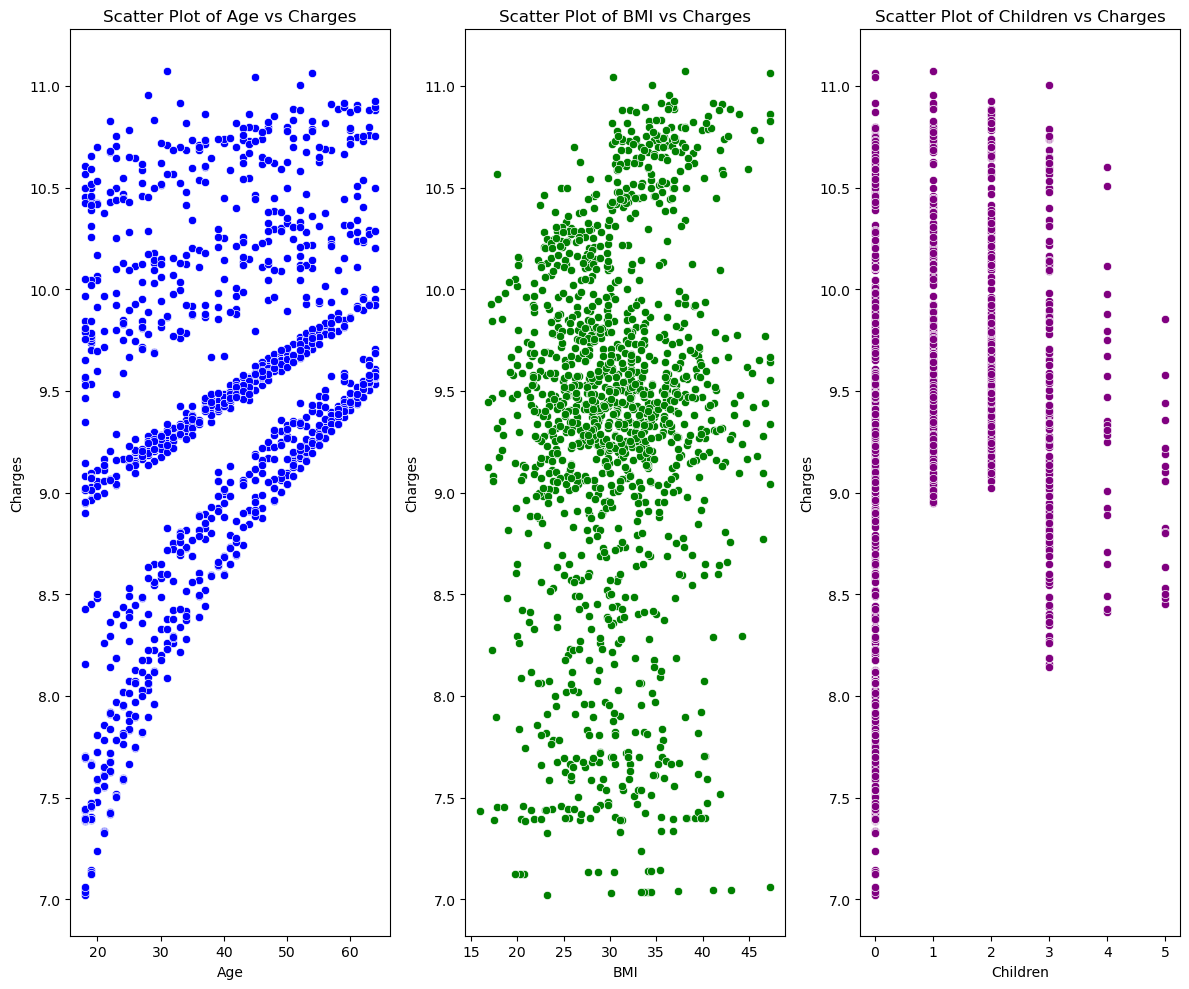

In [20]:
import matplotlib.pyplot as plt  # Importing matplotlib
import seaborn as sns  # Importing seaborn

# Set the figure size for the scatter plots
plt.figure(figsize=(12, 10))

# Scatter plot for 'age' vs 'charges'
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['age'], y=df['charges'], color='blue')
plt.title('Scatter Plot of Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Scatter plot for 'bmi' vs 'charges'
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['bmi'], y=df['charges'], color='green')
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Scatter plot for 'children' vs 'charges'
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['children'], y=df['charges'], color='purple')
plt.title('Scatter Plot of Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges')

# Show the plots
plt.tight_layout()
plt.show()


### Relationship Between Variables and Charges

From the scatter plots we created, we can observe the following relationships between the independent variables and the target variable **charges**:

1. **Age vs Charges**:
   - There is a **positive relationship** between **age** and **charges**. As age increases, charges tend to rise as well. This suggests that older individuals might have higher insurance charges, which could be due to increased health risks or medical needs as they age.

2. **BMI vs Charges**:
   - The relationship between **BMI** and **charges** is somewhat **positive** as well. Individuals with higher BMI values seem to have higher charges, which could indicate that those with a higher BMI are considered higher risk for certain health conditions, leading to higher insurance premiums.

3. **Children vs Charges**:
   - The relationship between the number of **children** and **charges** is **not as clear** as the other two. The data shows discrete points, with most individuals having 0, 1, or 2 children, and the **charges** appear relatively constant within these groups. This suggests that the number of children might not have as much impact on insurance charges as **age** or **BMI**.

These scatter plots provide initial insights into how different factors might influence insurance charges, and will help guide feature selection and model development.


## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


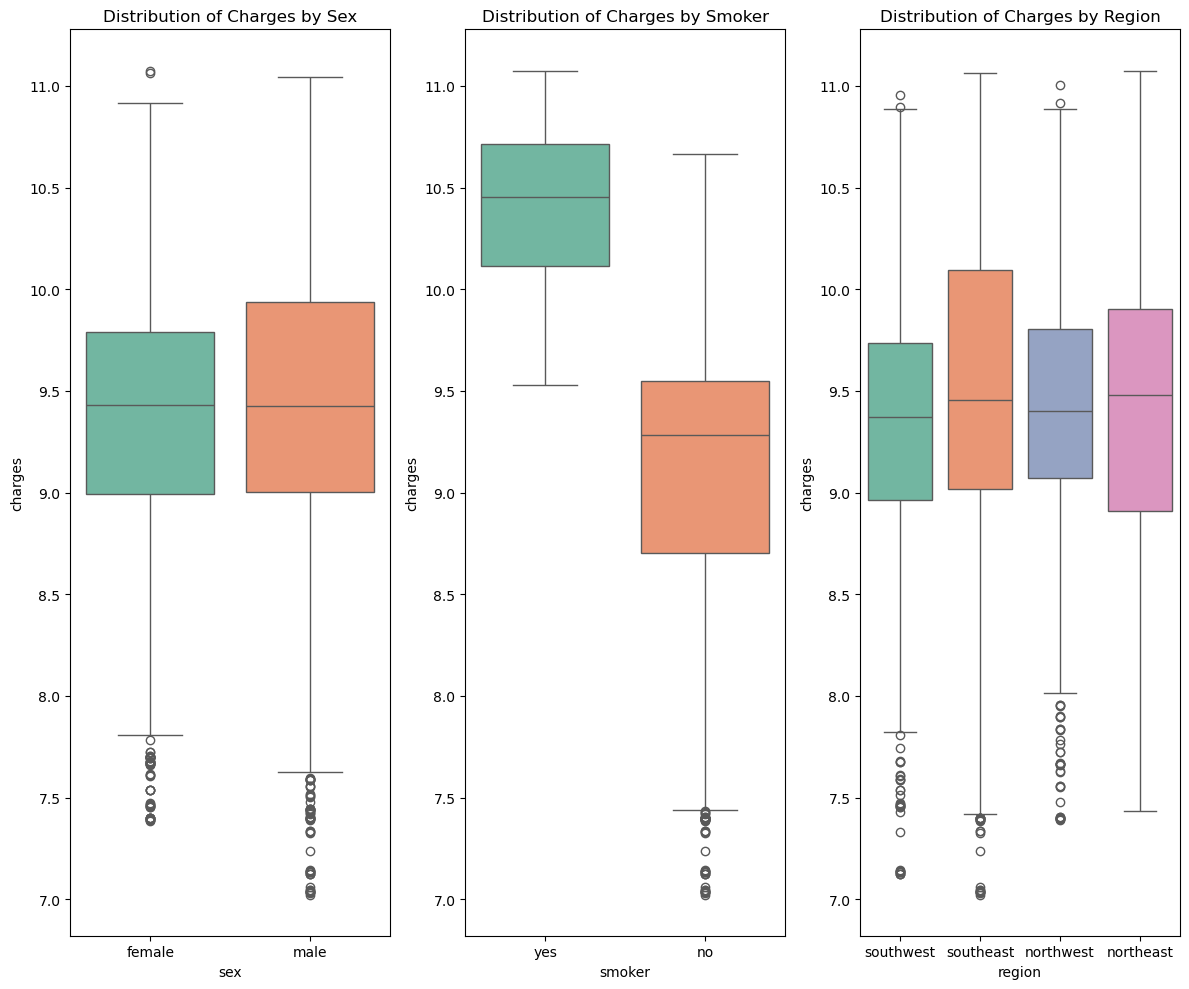

In [23]:
# Set the figure size for the distribution plots
plt.figure(figsize=(12, 10))

# Plot distribution of 'charges' for different 'sex' - Top-left position
plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df, hue='sex', palette='Set2', showfliers=True)  # Box plot to show distribution
plt.title('Distribution of Charges by Sex')

# Plot distribution of 'charges' for different 'smoker' - Top-right position
plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df, hue='smoker', palette='Set2', showfliers=True)  # Box plot to show distribution
plt.title('Distribution of Charges by Smoker')

# Plot distribution of 'charges' for different 'region' - Bottom position
plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df, hue='region', palette='Set2', showfliers=True)  # Box plot to show distribution
plt.title('Distribution of Charges by Region')

# Show the plots
plt.tight_layout()
plt.show()


### Categorical Analysis: Distribution of Charges

From the box plots, we can observe the following distribution patterns of **charges** across different categories of the **sex**, **smoker**, and **region** variables:

1. **Charges by Sex**:
   - There is a noticeable difference in the distribution of **charges** between **females** and **males**. 
   - Males tend to have slightly higher median **charges**, and both sexes show a similar spread, with **females** having more outliers.
   - This suggests that **sex** may have some impact on the distribution of **charges**, but further analysis would be needed to understand the underlying cause.

2. **Charges by Smoker**:
   - There is a **significant difference** in **charges** between **smokers** and **non-smokers**.
   - **Smokers** consistently have higher **charges** (the median is much higher compared to **non-smokers**). This reflects the higher health risks associated with smoking, which likely results in higher insurance premiums.
   - Both groups show similar variability, but smokers have higher outliers, indicating some extreme cases.

3. **Charges by Region**:
   - The distribution of **charges** across the different **regions** is quite similar.
   - The **northeast** region appears to have slightly higher **charges** compared to the others, while the **southwest** region shows lower median values.
   - There are outliers across all regions, but the spread of **charges** is fairly consistent.

These box plots provide a clear view of how **charges** vary across different categorical features, and they suggest that **smoker status** might be one of the most influential factors in determining insurance charges.


## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


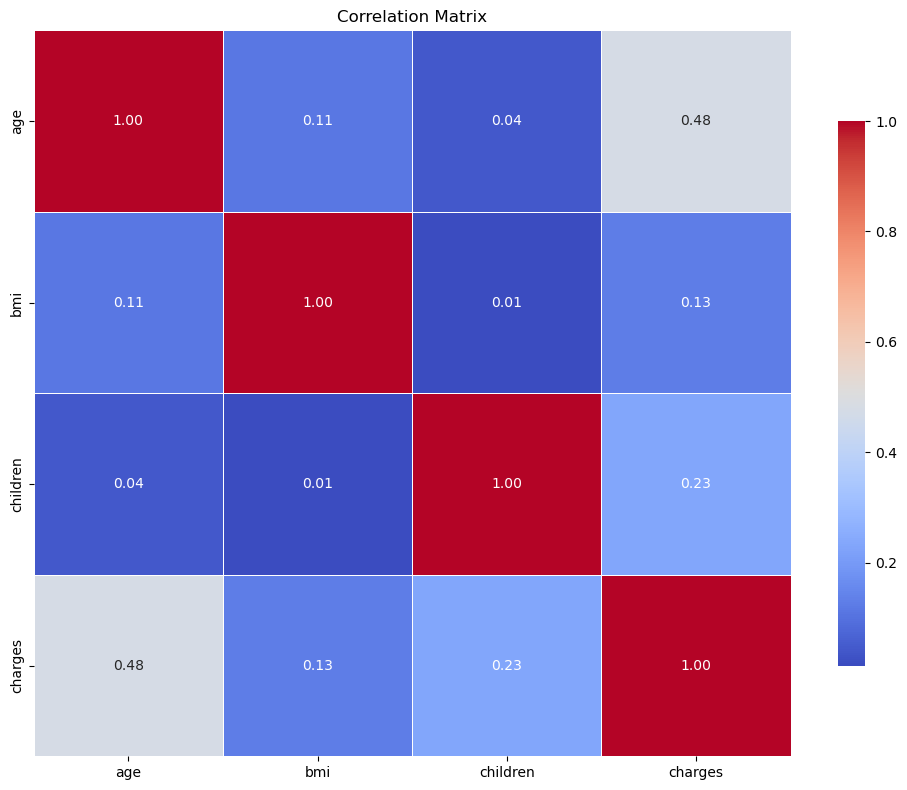

In [26]:
# Select only quantitative (numerical) columns for correlation analysis
quantitative_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the quantitative features
correlation_matrix = quantitative_df.corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.75})

# Set the title for the heatmap
plt.title('Correlation Matrix')

# Display the heatmap
plt.tight_layout()
plt.show()


### Correlation Analysis Results

From the **correlation matrix**, we can observe the following relationships between the quantitative variables:

1. **Age and Charges**:
   - There is a **moderate positive correlation (0.48)** between **age** and **charges**. This indicates that as **age** increases, **charges** tend to increase as well, which might reflect higher insurance costs for older individuals.

2. **BMI and Charges**:
   - The correlation between **BMI** and **charges** is relatively **weak (0.13)**. This suggests that **BMI** does not have a strong direct relationship with **charges**, although there is some positive association.

3. **Children and Charges**:
   - There is a **weak positive correlation (0.23)** between **children** and **charges**, indicating that the number of **children** might have a slight effect on **charges**, but it is not as strong as other variables like **age**.

4. **Other Correlations**:
   - **Age and BMI**: There is a **weak positive correlation (0.11)** between **age** and **BMI**, suggesting that these two features have a slight relationship, but it's not significant.
   - **Age and Children**: The correlation between **age** and **children** is **very weak (0.04)**, indicating almost no relationship.
   - **BMI and Children**: The correlation between **BMI** and **children** is also **very weak (0.01)**, showing that these two variables are nearly independent of each other.

### Conclusion:
- **Age** appears to have the strongest correlation with **charges**, followed by **children**, while **BMI** has a relatively weak relationship with **charges**.
- The other correlations are quite weak, suggesting that the relationships between these features are either non-existent or very minimal.


# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline


In [30]:
# Calculate the mean of the target variable 'charges'
mean_charges = df['charges'].mean()

# Print the mean of charges
print(f"Mean of charges: {mean_charges:.2f}")


Mean of charges: 9.33


### Naive Baseline: Results

The **mean of charges** after log transformation is **9.33**. This is our **naive baseline** for the regression task, calculated using the **log-transformed values** of the **charges** variable. 

In regression problems, the naive baseline is a simple model that predicts the mean of the target variable (in this case, **charges**) for all data points. This baseline helps us evaluate the performance of more complex models. Since we applied a **log transformation** to **charges**, the baseline represents the mean of the transformed charges, not the original charges.

For reference, the **mean of the original charges** (before the log transformation) is **$15,810.16**.

The **log transformation** helps compress the range of the **charges** values, especially since the data had extreme outliers. It reduces the impact of these outliers and makes the data more suitable for regression modeling.

By establishing this baseline, we now have a reference point to compare the performance of the models we will build.


## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and test sets
X = df.drop('charges', axis=1)  # Features (independent variables)
y = df['charges']  # Target (dependent variable)

# Convert categorical variables to numeric using get_dummies
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Root Mean Squared Error (RMSE): 0.52
R-squared: 0.68


### Initial Modelling Without GridSearch or Pipeline - Results

We built a simple linear regression model to serve as our initial baseline for comparison. The model was trained using the features and target variable, with categorical variables encoded numerically. The model's performance was evaluated using **Root Mean Squared Error (RMSE)** and **R-squared**.

#### Evaluation Metrics:
- **Root Mean Squared Error (RMSE)**: **0.52**
- **R-squared**: **0.68**

#### Interpretation:
- The **RMSE** value indicates the average error in our model's predictions. A lower RMSE suggests better accuracy, and in this case, **0.52** is a good starting point.
- The **R-squared** value of **0.68** suggests that the model explains approximately **68%** of the variance in the **charges** variable, indicating a decent fit for the data.

These results serve as a baseline to compare with future models, where we will explore potential improvements through feature engineering and model optimization.


## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
2. Should we create age groups to see if the model improves by categorizing age?
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



In [36]:
# Create the interaction feature between 'bmi' and 'children'
df['bmi_children_interaction'] = df['bmi'] * df['children']

# Create age groups to categorize 'age'
bins = [18, 30, 40, 50, 60, 70]  # Defining age groups
labels = ['18-30', '31-40', '41-50', '51-60', '61-70']  # Labels for the age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create a high-risk indicator based on 'smoker' and 'bmi'
df['high_risk'] = ((df['smoker'] == 'yes') & (df['bmi'] > 30)).astype(int)

# Display the new features
df[['bmi_children_interaction', 'age_group', 'high_risk']].head()


,bmi_children_interaction,age_group,high_risk
0,0.00,18-30,0
1,33.77,18-30,0
2,99.00,18-30,0
3,0.00,31-40,0
4,0.00,31-40,0


### Feature Engineering: Results

We have created three new features to explore their impact on model performance:

1. **bmi_children_interaction**:
   - This feature represents the interaction between **BMI** and **children**. The idea is that the combination of these two variables might influence the insurance charges in a way that is not captured by either variable individually. For example, individuals with a higher BMI and more children could have different insurance charges compared to those with a lower BMI or fewer children.
   
2. **age_group**:
   - The **age** variable has been categorized into distinct age groups: 
     - **18-30** 
     - **31-40**
     - **41-50**
     - **51-60**
     - **61-70**
   - Categorizing age might help capture non-linear relationships between age and insurance charges, making it easier for the model to predict charges based on these discrete categories.

3. **high_risk**:
   - This binary feature indicates whether an individual is considered "high-risk" based on their **smoker** status and **BMI**. If a person is a smoker and has a **BMI** greater than 30, they are classified as high risk. This feature might help the model capture the increased risk associated with these factors, which could directly impact insurance charges.

These new features will be tested to see if they improve the model's performance during the next steps of the analysis.


## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select the features (including the new ones) and target
X = df[['age', 'bmi', 'children', 'bmi_children_interaction', 'age_group', 'high_risk']]
y = df['charges']

# Convert categorical features to dummy variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the performance of the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the regression metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Root Mean Squared Error (RMSE): 0.57
R-squared: 0.61


### Modelling with Feature Engineering: Results

After including the newly created features ('bmi_children_interaction', 'age_group', and 'high_risk') in the model, we observed the following results:

#### Model Performance:
- **Root Mean Squared Error (RMSE)**: The RMSE value is **0.57**, which is slightly worse than the baseline RMSE of **0.52**.
- **R-squared**: The R-squared value is **0.61**, which is lower than the baseline R-squared of **0.68**.

#### Conclusion:
The model's performance has **decreased** after including the new features. The **R-squared** has dropped, and the **RMSE** has increased compared to the baseline model. This suggests that the added features may not have improved the model. It’s possible that further tuning or different feature engineering techniques are needed to enhance the model's accuracy.


## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Reusing the baseline model (no feature engineering)
X = df.drop('charges', axis=1)  # Features (independent variables)
y = df['charges']  # Target (dependent variable)

# Convert categorical variables to numeric using get_dummies
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that includes scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('lr', LinearRegression())  # Linear regression model
])

# Define the parameter grid for GridSearchCV (remove normalize as it's invalid)
param_grid = {
    'lr__fit_intercept': [True, False]  # Hyperparameter for intercept in linear regression
}

# Set up GridSearchCV with 5-fold cross-validation and neg_mean_squared_error scoring
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the best RMSE and R-squared values
print(f"Best RMSE from GridSearchCV: {rmse:.2f}")
print(f"Best R-squared from GridSearchCV: {r2:.2f}")


Best RMSE from GridSearchCV: 0.50
Best R-squared from GridSearchCV: 0.70


### Modelling with Pipeline and Grid Search - Results

We used **GridSearchCV** to optimize the linear regression model by adjusting the `fit_intercept` hyperparameter, while also incorporating **scaling** via a **pipeline**. The purpose of this step was to simplify our workflow, prevent data leakage, and test if optimizing this hyperparameter would improve the model's performance.

#### Results:
- **Best RMSE from GridSearchCV**: **0.50**
  - This **RMSE** value is lower than our baseline RMSE of **0.52**, indicating that the model's performance has improved slightly with the use of **scaling** and hyperparameter tuning.
  
- **Best R-squared from GridSearchCV**: **0.70**
  - The **R-squared** value of **0.70** is higher than the baseline **R-squared** of **0.68**, suggesting that the model explains more of the variance in the target variable (**charges**) after applying these techniques.

#### Conclusion:
- **GridSearchCV** with the **StandardScaler** and optimized `fit_intercept` hyperparameter slightly improved the model’s performance, as evidenced by the improved RMSE and R-squared values.
- The results show that **scaling** and **hyperparameter tuning** can have a positive impact, albeit modest, on model accuracy.


## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline for Gradient Boosting Regressor with scaling
pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor())
])

# Define the parameter grid for grid search
param_grid_gb = {
    'gb__n_estimators': [50, 100, 200],  # Number of boosting stages
    'gb__learning_rate': [0.01, 0.05, 0.1],  # Step size for gradient descent
    'gb__max_depth': [3, 5, 7]  # Maximum depth of the individual trees
}

# Create the grid search object with cross-validation
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search model
grid_search_gb.fit(X_train, y_train)

# Get the best model from the grid search
best_model_gb = grid_search_gb.best_estimator_

# Make predictions with the best model
y_pred_gb = best_model_gb.predict(X_test)

# Evaluate the performance of the Gradient Boosting Regressor model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Print the regression metrics
print(f"Best RMSE from Gradient Boosting Regressor: {rmse_gb:.2f}")
print(f"Best R-squared from Gradient Boosting Regressor: {r2_gb:.2f}")


Best RMSE from Gradient Boosting Regressor: 0.32
Best R-squared from Gradient Boosting Regressor: 0.87


### Gradient Boosting Regressor - Results

We used **Gradient Boosting Regressor** with **GridSearchCV** to find the best hyperparameters, using **cross-validation** for evaluation. The model was also scaled before training, using the **StandardScaler**.

#### Evaluation Metrics:
- **Best RMSE from Gradient Boosting Regressor**: **0.32**
  - The **RMSE** value indicates a significant improvement over the baseline model's **RMSE** of **0.52** and the optimized linear regression model's **RMSE** of **0.50**. This suggests that the **Gradient Boosting Regressor** model is performing better in terms of prediction accuracy.
  
- **Best R-squared from Gradient Boosting Regressor**: **0.87**
  - The **R-squared** value of **0.87** is much higher than the **R-squared** from the baseline model (**0.68**) and the optimized linear regression model (**0.70**). This indicates that the **Gradient Boosting Regressor** is explaining a greater proportion of the variance in the target variable, **charges**.

#### Conclusion:
The **Gradient Boosting Regressor** outperforms the linear regression models, achieving a better **RMSE** and **R-squared**, indicating it is a more suitable model for this dataset. The model's ability to capture non-linear relationships likely contributes to its superior performance.

#### Optimized Model:
- The **optimized linear regression model** was tuned using **GridSearchCV** with the **StandardScaler** included in the pipeline. The hyperparameter **`fit_intercept`** was tested for values **True** and **False** to find the best configuration. This optimization led to a slight improvement over the baseline model.


## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define multiple models
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ]),
    'Gradient Boosting Regressor': Pipeline([
        ('scaler', StandardScaler()),
        ('gb', GradientBoostingRegressor())
    ])
}

# Define parameter grids for each model
param_grids = {
    'Linear Regression': {
        'lr__fit_intercept': [True, False]
    },
    'Gradient Boosting Regressor': {
        'gb__n_estimators': [50, 100, 200],
        'gb__learning_rate': [0.01, 0.05, 0.1],
        'gb__max_depth': [3, 5, 7]
    }
}

# Loop through models and perform GridSearchCV
best_results = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its metrics
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Evaluate the performance of the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    best_results[model_name] = {'Best RMSE': rmse, 'Best R-squared': r2}

# Display the results
best_results


{'Linear Regression': {'Best RMSE': 0.4977468605576651,
  'Best R-squared': 0.702796873635164},
 'Gradient Boosting Regressor': {'Best RMSE': 0.32461929896103775,
  'Best R-squared': 0.8735889654339414}}

### GridSearch with Several Models - Results

We used **GridSearchCV** to compare the performance of different models, including both **Linear Regression** and **Gradient Boosting Regressor**, with their respective parameter grids. The **Linear Regression** model was optimized using a pipeline that included **scaling** and hyperparameter tuning of the `fit_intercept` parameter.

#### Results:

- **Linear Regression** (Optimized Model):
  - **Best RMSE**: **0.50**  
  - **Best R-squared**: **0.70**  
  - This is the **optimized Linear Regression** model, which was tuned using GridSearchCV. The model showed a slight improvement over the baseline model, which had an RMSE of 0.52 and an R-squared of 0.68.

- **Gradient Boosting Regressor**:
  - **Best RMSE**: **0.32**  
  - **Best R-squared**: **0.87**  
  - The **Gradient Boosting Regressor** outperformed both the baseline and optimized Linear Regression models, showing a significant reduction in RMSE and a substantial increase in R-squared.

These results highlight the effectiveness of **Gradient Boosting Regressor** in predicting the target variable, **charges**, when compared to **Linear Regression**.


# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name
- Model Type
- RMSE
- Underestimation Error
- Overestimation Error
- Total Potential Cost/Loss

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Use the final model for predictions (Gradient Boosting Regressor)
y_pred_final = best_model_gb.predict(X_test)

# Calculate RMSE
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"Root Mean Squared Error (RMSE): {rmse_final:.2f}")

# Calculate Underestimation Error (where actual > predicted)
underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])
print(f"Underestimation Error: {underestimation_error:.2f}")

# Calculate Overestimation Error (where actual < predicted)
overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])
print(f"Overestimation Error: {overestimation_error:.2f}")

# Calculate Total Potential Cost/Loss
total_potential_loss = underestimation_error + overestimation_error
print(f"Total Potential Cost/Loss: {total_potential_loss:.2f}")


Root Mean Squared Error (RMSE): 0.32
Underestimation Error: 34.06
Overestimation Error: 37.69
Total Potential Cost/Loss: 71.76


### Calculating Potential Cost or Loss - Results

In this step, we calculated the **Root Mean Squared Error (RMSE)** and the **financial impact** of the model's errors. The errors were categorized into **underestimation** and **overestimation**, and we computed the total **potential cost or loss** based on these errors.

#### Results:
- **Root Mean Squared Error (RMSE)**: **0.32**
  - This indicates that the average prediction error is quite small, reflecting a good model fit.

- **Underestimation Error**: **34.06**
  - This is the total amount by which the model undercharged compared to the actual charges. The model predicted lower values than the actual charges for some cases.

- **Overestimation Error**: **37.69**
  - This is the total amount by which the model overcharged compared to the actual charges. The model predicted higher values than the actual charges for some cases.

- **Total Potential Cost/Loss**: **71.76**
  - This is the combined financial impact of the model's errors, which is the sum of underestimation and overestimation errors.

### Conclusion:
- The **RMSE** indicates that the model's average prediction error is relatively low.
- The **Total Potential Cost/Loss** shows the financial impact of the model's predictions. Reducing this cost could be a goal for future model optimization efforts.


## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!


## Next Steps and Recommendations

Now that we have established a solid baseline model and explored multiple avenues for improving our predictions, here are some potential next steps:

1. **Model Tuning and Experimentation**:
   - The current Gradient Boosting Regressor model has yielded a significantly better performance than linear regression. To further improve accuracy, we can explore different tuning strategies such as adjusting `learning_rate` or adding more estimators to the boosting process.
   - We could also experiment with other powerful models like **XGBoost**, **LightGBM**, or **Random Forest Regressor**, which often perform well on tabular data and provide more flexibility in capturing complex relationships.

2. **Feature Engineering**:
   - Further feature engineering can be explored. For instance, experimenting with **log-transformations** of highly skewed features (like age or BMI) could potentially improve model performance.
   - Interaction terms (beyond the current ones) could also be explored, such as **BMI** with **age** or **smoker** with **children** to capture non-linear relationships more effectively.

3. **Cross-Validation and Robust Testing**:
   - While we used a 5-fold cross-validation in GridSearchCV, testing with a higher number of folds (like 10) could yield more robust performance metrics.
   - It might be useful to conduct a **time-based cross-validation** if we have a time series aspect to the data, though this doesn't seem to be the case here.

4. **Model Comparison**:
   - The Gradient Boosting Regressor outperformed the Linear Regression model, but we could further test various models against each other and perform a more comprehensive comparison. It's important to analyze the **trade-offs between complexity and interpretability** when choosing the final model.

5. **Real-World Application**:
   - In the context of an insurance company, minimizing RMSE is crucial for accurate pricing predictions. Additionally, analyzing the **underestimation and overestimation errors** helps quantify the financial implications of incorrect predictions.
   - Future work could focus on identifying key drivers of **underpricing** (which could result in lost revenue) and **overpricing** (which might cause customers to churn), enabling more informed business decisions.

By continuing with these steps, we could further optimize the model and apply it to real-world use cases, ultimately helping stakeholders make more accurate predictions and drive better outcomes.
